In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


### 국가별 일별 누적 가로 막대 그래프

In [137]:
df = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv')

In [138]:
df = df.loc[df['국가'].isin(['프랑스', '영국', '중국'])].set_index('국가')
df

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [139]:
col_names = df.columns.to_list()
col_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [140]:
# 국가별 Numpy 배열을 저장하고 있는 사전 생성
chartdata = {}

for i in df.index:
    chartdata[i] = df.loc[i].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790]),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052]),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991])}

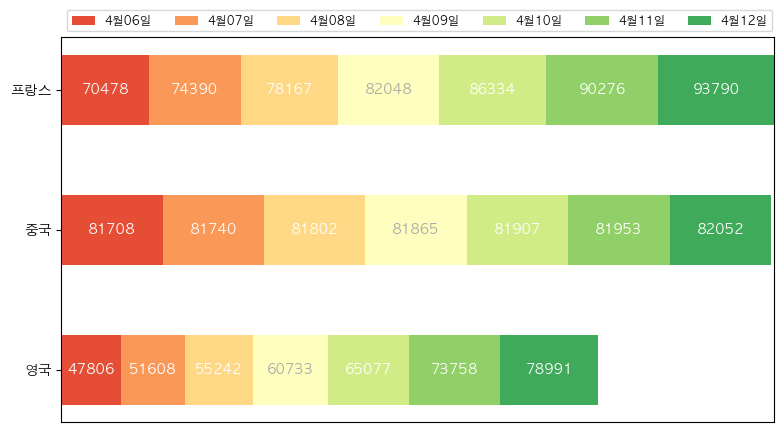

In [141]:
# 그래프 생성 함수

label = list(chartdata.keys())
data = np.array(list(chartdata.values()))
data_cum = data.cumsum(axis = 1)
category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize = (9.2, 5))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, data.sum(axis = 1).max())

for i, (col, color) in enumerate(zip(col_names, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax.barh(label, widths, height = 0.5, left = starts, label = col, color = color)
    xcenters = starts + (widths / 2)
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax.text(x, y, str(int(c)), ha = 'center', va = 'center', color = text_color)

ax.legend(ncol = len(col_names), bbox_to_anchor = (0, 1),
         loc = 'lower left', fontsize = 'small')

### 서브 플로팅 사용하기

In [142]:
df = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv')
df = df.set_index('국가')
chartdata = df.loc['미국', :]

In [143]:
# 2행 1열 서브 플롯

def makebarchart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows = 2, ncols = 1)
    chartdata.plot(kind = 'bar', ax = axes[0], rot = 0, alpha = 0.7)
    chartdata.plot(kind = 'barh', ax = axes[1], color = 'm', alpha = 0.7)

    fig.suptitle(suptitle)

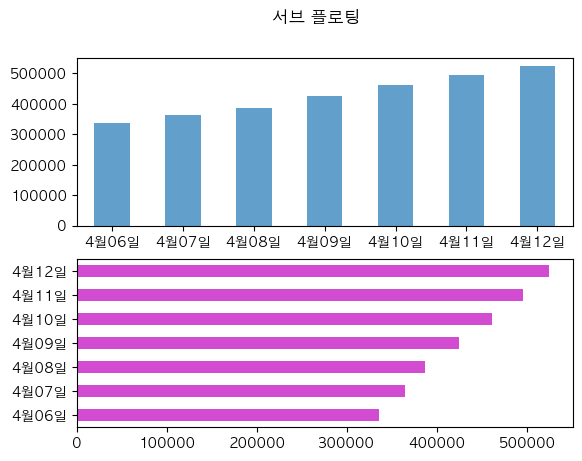

In [144]:
makebarchart04(chartdata, '서브 플로팅')

# 파이 그래프

### (1) 사용자 정의 비율 지정

In [145]:
df = pd.read_csv('../data/주요발생국가주간동향(4월2째주).csv', index_col = '국가')
chartdata = df.loc[['독일', '프랑스', '중국', '영국'], '4월06일']
mylabel = chartdata.index
chartdata

국가
독일     100024
프랑스     70478
중국      81708
영국      47806
Name: 4월06일, dtype: int64

In [146]:
mycolors = ['blue', '#6AFF00', 'yellow', '#FF003C']

Text(0.5, 0, '국가명')

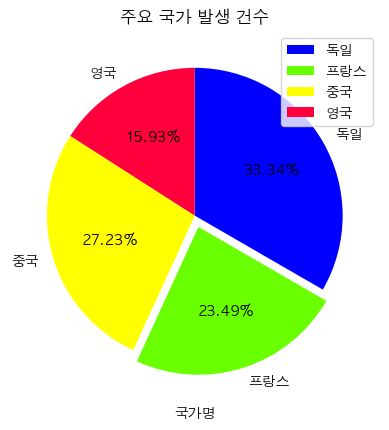

In [147]:
plt.figure()
plt.pie(chartdata, labels = mylabel, colors = mycolors, shadow=False, explode = (0, 0.08, 0, 0), autopct = '%1.2f%%', startangle = 90, counterclock = False)

plt.grid(True)
plt.title('주요 국가 발생 건수')
plt.legend(loc = 1)
plt.xlabel('국가명')

### (2) 사용자 정의 포지셔닝

[None, None, None, None, None, None, None, None]

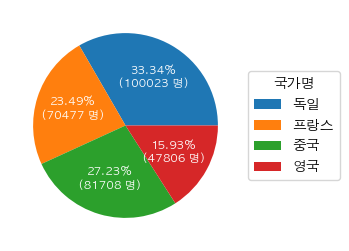

In [148]:
# 함수 정의 -> getLabelFormat()
# 전체 비율에 대한 소수점과 인원수까지 표현
# 파라미터: pct(비율), allvals(건수, Series객체)

fig, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

def getLabelFormat(pct, allvals):
    absolute = int(pct/100 * np.sum(allvals))
    return "{:.2f}%\n({:d} 명)" .format(pct, absolute)

# ax.pie의 반환값
# wedges: 파이 차트의 각 조각에 해당하는 matplotlib.patches.Wedge 객체들의 리스트
# texts: 각 조각에 해당하는 텍스트 라벨(matplotlib.text.Text 객체)의 리스트
# autotexts: autopct를 통해 자동으로 생성된 텍스트 라벨(matplotlib.text.Text 객체)의 리스트
wedges, texts, autotexts = ax.pie(chartdata, autopct = lambda pct: getLabelFormat(pct, chartdata), textprops = dict(color = 'w'))

ax.legend(wedges, mylabel, title = '국가명', loc = 'center left', bbox_to_anchor = (1, 0, 0.05, 1))

plt.setp(autotexts, size = 8, weight = 'bold')

### (3) 도넛 파이 그래프

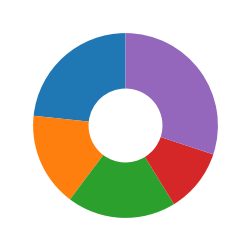

In [149]:
df = df.loc[['독일', '프랑스', '중국', '영국', '이탈리아'], ['4월06일']]

fix, ax = plt.subplots(figsize = (6, 3), subplot_kw = dict(aspect = 'equal'))

# 도넛 구멍 크기는 wedgeprops 매개변수를 딕셔너리 형태로 전달

wedges, texts = ax.pie(df.values.flatten(), wedgeprops = dict(width = 0.6), startangle = 90)

bbox_props = dict(boxstyle = 'square, pad = 0.3', fc = 'w', ec = 'k', lw = 0.72)
kw = dict(arrowprops = dict(arrowstyle = '-'), bbox = bbox_props, zorder = 0, va = 'center')

# 상자 수염 그래프

### (1) 상자 수염
- 사용자 정의 색상

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

# 운영 체제 확인
if platform.system() == 'Darwin':  # Mac
    print('apple gothic')
    font_name = 'AppleGothic'
elif platform.system() == 'Windows':  # Windows
    font_name = 'NanumGothic'
else:
    font_name = None

# 한글 폰트 설정
if font_name:
    plt.rcParams['font.family'] = font_name

# 마이너스 부호 설정
plt.rcParams['axes.unicode_minus'] = False

apple gothic


In [151]:
df = pd.read_csv('../data/tips.csv', index_col = 0)

dinner = df.loc[df['time'] == 'Dinner', 'total_bill']
dinner.index.name = 'Dinner'

lunch = df.loc[df['time'] == 'Lunch', 'total_bill']
lunch.index.name = 'Lunch'

In [152]:
chartdata = [np.array(dinner), np.array(lunch)]
chartdata

[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
        14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
        16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
        12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
        16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
        18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
        25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
        18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
        26.86, 25.28, 14.73, 10.51, 17.92, 28.97, 22.49,  5.75, 16.32,
        22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3 ,
        22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
        38.07, 23.95, 25.71, 17.31, 29.93, 14.07, 13.13, 17.26, 24.55,
        19.77, 29.85, 48.17, 25.  , 13.39, 16.49, 21.5 , 12.66, 16.21,
        13.81, 17.51, 24.52, 20.76, 31.71, 10.59, 10.63, 50.81, 15.81,
      

/var/folders/f6/ls8v29ts7f93qct6dbzxt0kr0000gn/T/ipykernel_1184/2829648291.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot1 = ax1.boxplot(chartdata,
/var/folders/f6/ls8v29ts7f93qct6dbzxt0kr0000gn/T/ipykernel_1184/2829648291.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2 = ax2.boxplot(chartdata,


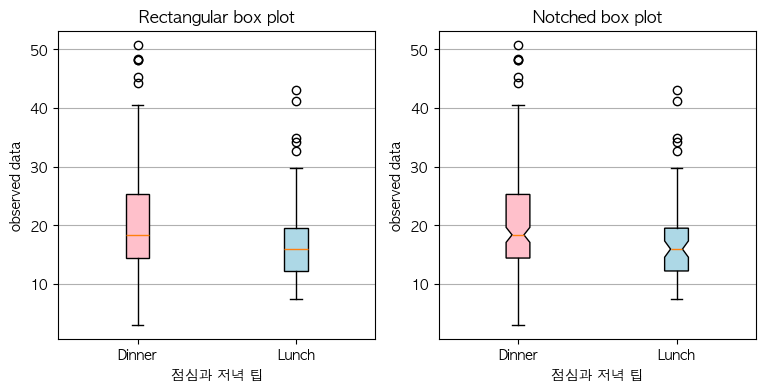

In [153]:
# x축을 위한 레이블
xtick_label = ['Dinner', 'Lunch']

# 1행 2열의 도화지 생성
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

# 사각형 형태의 상자 수염 그래프
bplot1 = ax1.boxplot(chartdata,
            vert = True,    # vertical box
            patch_artist = True,    # 색상 채우기
            labels = xtick_label)
ax1.set_title('Rectangular box plot')

# notch 형태의 상자 수염 그래프
bplot2 = ax2.boxplot(chartdata,
            notch = True,   # notche shape
            vert = True,
            patch_artist = True,
            labels = xtick_label)
ax2.set_title('Notched box plot')

# 색상 채우기
colors = ['pink', 'lightblue']  # fill with colors

for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# 수평 그리드 라인 채우기
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('observed data')

### (2) 상자 수염과 바이올린 그래프

In [154]:
df = pd.read_csv('../data/tips.csv', index_col = 0)

dinner = df.loc[df['time'] == 'Dinner', 'total_bill']
dinner.index.name = 'Dinner'

lunch = df.loc[df['time'] == 'Lunch', 'total_bill']
lunch.index.name = 'Lunch'

chartdata = [np.array(dinner), np.array(lunch)]
chartdata

[array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
        14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
        16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
        12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
        16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
        18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
        25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
        18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
        26.86, 25.28, 14.73, 10.51, 17.92, 28.97, 22.49,  5.75, 16.32,
        22.75, 40.17, 27.28, 12.03, 21.01, 12.46, 11.35, 15.38, 44.3 ,
        22.42, 20.92, 15.36, 20.49, 25.21, 18.24, 14.31, 14.  ,  7.25,
        38.07, 23.95, 25.71, 17.31, 29.93, 14.07, 13.13, 17.26, 24.55,
        19.77, 29.85, 48.17, 25.  , 13.39, 16.49, 21.5 , 12.66, 16.21,
        13.81, 17.51, 24.52, 20.76, 31.71, 10.59, 10.63, 50.81, 15.81,
      

 Text(1, 0, 'Dinner'),
 Text(2, 0, 'Lunch'),
 Text(1, 0, 'Dinner'),
 Text(2, 0, 'Lunch')]

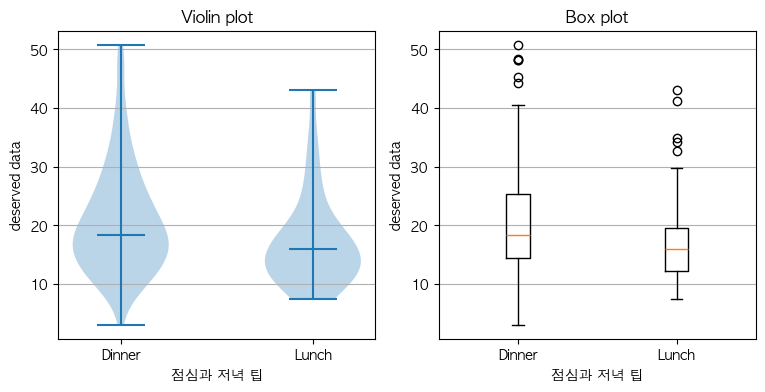

In [155]:
# plot violin plot

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (9, 4))

# 바이올린과 상자 수염 그래프
axs[0].violinplot(chartdata,
                  showmeans = False,
                  showmedians = True)
axs[0].set_title('Violin plot')

axs[1].boxplot(chartdata,
               patch_artist = False)
axs[1].set_title('Box plot')

# 수평 Grid 라인
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xlabel('점심과 저녁 팁')
    ax.set_ylabel('deserved data')

# x tick 지정 (Dinner, Lunch)
plt.setp(axs, xticks = [y + 1 for y in range(len(chartdata))], xticklabels = ['Dinner', 'Lunch'])

# 히스토그램

### (1) 단일 히스토그램

In [156]:
df = pd.read_csv('../data/human_height.csv')
df

,giant,dwarf,man,woman
0,238.546060,124.103335,179.916745,159.490128
1,252.392501,137.276266,177.416055,172.558434
2,240.544939,130.792817,182.664449,145.299985
3,261.237121,132.296450,175.602169,159.458091
4,255.259860,133.228272,178.859996,163.211875
...,...,...,...,...
995,248.682492,134.647524,179.517798,165.736301
996,263.363421,116.168448,166.447602,154.842039
997,234.220693,114.580477,185.995531,162.115534
998,257.068424,136.411198,177.157406,157.741702


In [157]:
man = df['man']
woman = df['woman']

woman.describe()

count    1000.000000
mean      159.132374
std         9.968715
min       128.339049
25%       152.342228
50%       159.212710
75%       165.942207
max       189.364494
Name: woman, dtype: float64

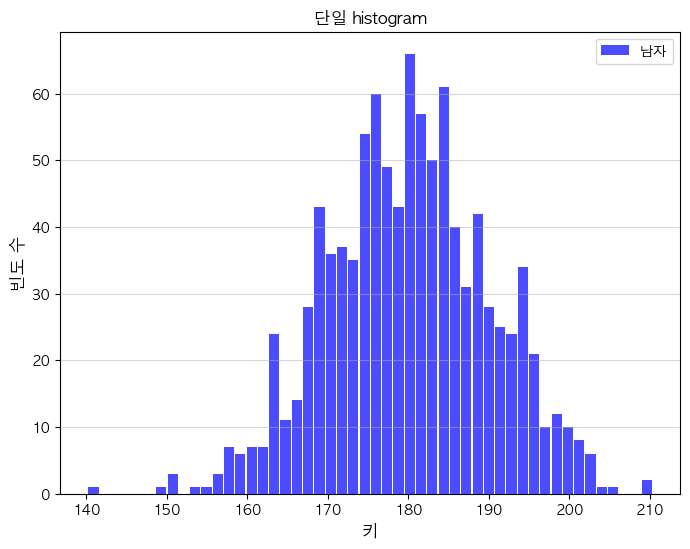

In [158]:
# 남자 신장에 대한 히스토그램
plt.figure(figsize = (8, 6))
plt.hist(man, bins = 50, alpha = 0.7, facecolor = 'blue', label = '남자', rwidth = 0.9)
plt.legend(loc = 'upper right')
plt.xlabel('키', size = 12)
plt.ylabel('빈도 수', size = 12)
plt.title('단일 histogram')
plt.grid(axis = 'y', alpha = 0.5)

### (2) 다중 히스토그램

Text(0.5, 1.0, '다중 히스토그램')

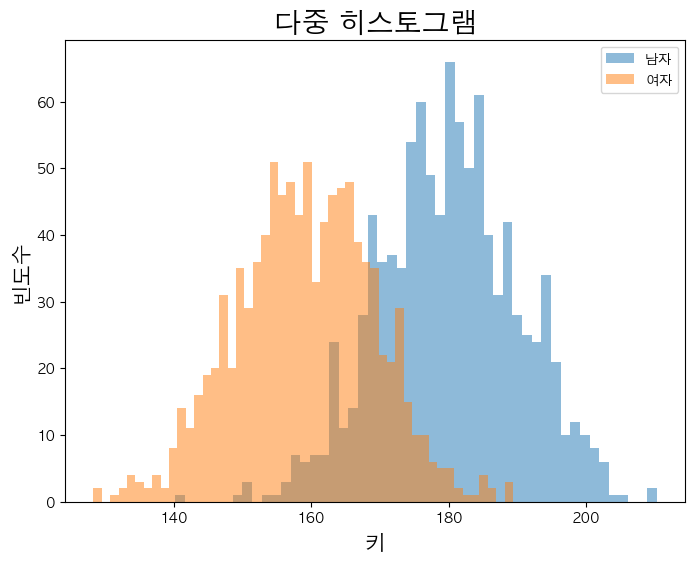

In [159]:
plt.figure(figsize = (8, 6))
plt.hist(man, bins = 50, alpha = 0.5, label = '남자')
plt.hist(woman, bins = 50, alpha = 0.5, label = '여자')
plt.legend(loc = 'upper right')
plt.xlabel('키', size = 15)
plt.ylabel('빈도수', size = 15)
plt.title('다중 히스토그램', size = 20)

### (3) 총 결제 금액 데이터

In [160]:
df = pd.read_csv('../data/tips.csv', index_col = 0)
X = df['total_bill']
X

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

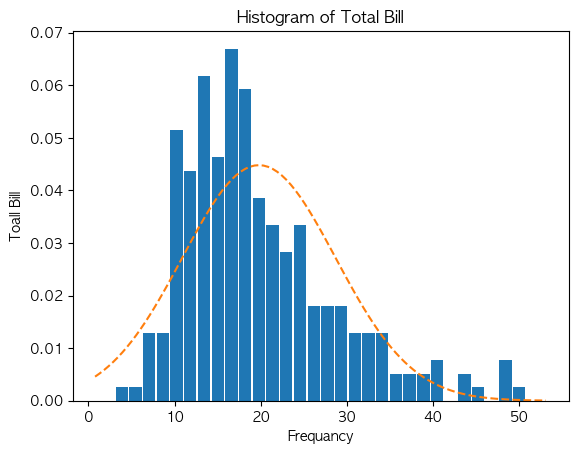

In [161]:
# 히스토그램
fig, ax = plt.subplots()
n, bins, patch = ax.hist(X, bins = 30, density = True, rwidth = 0.9)

ax.set_title('Histogram of Total Bill')
ax.set_xlabel('Frequancy')
ax.set_ylabel('Toall Bill')

# 확률 밀도 곡선을 위한 평균값 및 표준편차 계산
mean = X.mean()
std = X.std()

# 확률 밀도 곡선 그리기 위한 데이터 생성
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# 확률 밀도 곡선 그리기
ax.plot(x, p, '--')


### (4) 총 결제 금액(계급 구간 조정)

Text(0, 0.5, 'Total Bill')

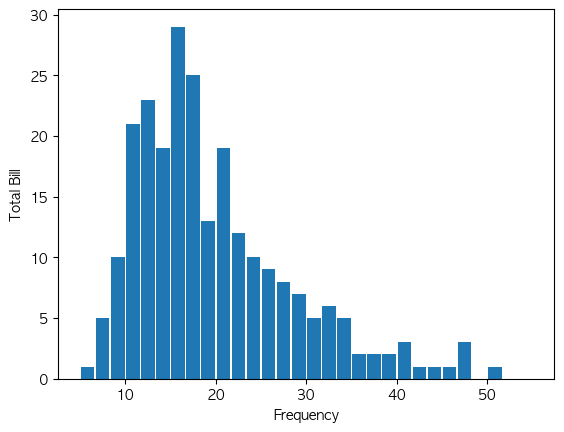

In [162]:
# bins와 range로 계급 구간 조정

fig, axs = plt.subplots()
plt.hist(X, bins = 30, rwidth = 0.9, range = (5, 55))
plt.xlabel('Frequency')
plt.ylabel('Total Bill')

### (5) 거인국과 소인국의 신장 히스토그램

In [163]:
df = pd.read_csv('../data/human_height.csv')
giant = df['giant']
dwarf = df['dwarf']

Text(0.5, 1.0, '소인국의 키')

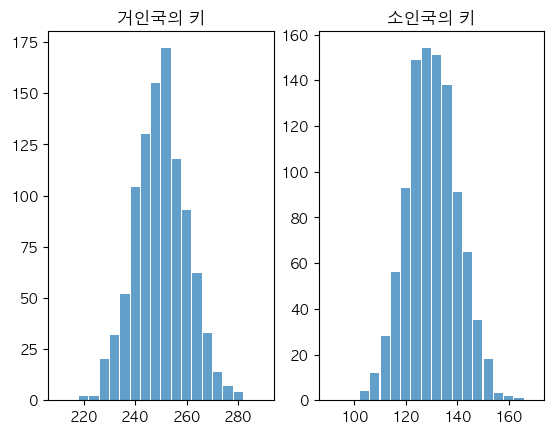

In [164]:
fig , axs = plt.subplots(nrows = 1, ncols = 2)

axs[0].hist(giant, bins = 20, range = (210, 290), alpha = 0.7, rwidth = 0.9)
axs[1].hist(dwarf, bins = 20, range = (90, 170), alpha = 0.7, rwidth = 0.9)

axs[0].set_title('거인국의 키')
axs[1].set_title('소인국의 키')

### (6) 거인국과 소인국의 신장 히스토그램을 동일 화면에 그리기

(array([  4.,   8.,  13.,  27.,  41.,  72.,  83., 125., 116., 115., 105.,
        100.,  67.,  52.,  31.,  25.,  10.,   3.,   0.,   3.]),
 array([102.3735817 , 105.41969031, 108.46579892, 111.51190753,
        114.55801614, 117.60412475, 120.65023336, 123.69634197,
        126.74245058, 129.78855919, 132.8346678 , 135.88077641,
        138.92688502, 141.97299363, 145.01910224, 148.06521085,
        151.11131946, 154.15742807, 157.20353668, 160.24964529,
        163.2957539 ]),
 <BarContainer object of 20 artists>)

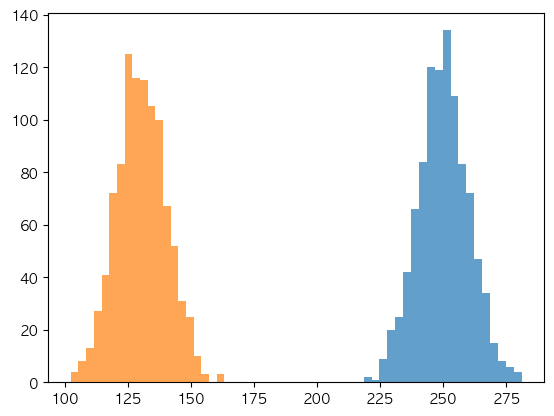

In [165]:
fig, axs = plt.subplots()
axs.hist(giant, bins = 20, alpha = 0.7)
axs.hist(dwarf, bins = 20, alpha = 0.7)

### (7) 히스토그램의 누적

Text(0.5, 1.0, '누적 히스토그램')

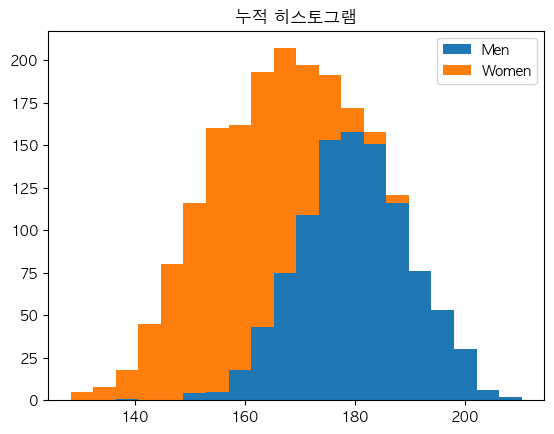

In [166]:
man = df['man']
woman = df['woman']

# 남자와 여자 키 데이터를 numpy 형태의 1000행 2열로 변환
x = np.array([man, woman]).T

fig, axs = plt.subplots()
axs.hist(x, bins = 20, stacked = True, histtype = 'bar', label = ['Men', 'Women'])
axs.legend()
axs.set_title('누적 히스토그램')

